# **Project Name** - Unsupervised ML - Netflix Movies and TV Shows Clustering  
##### **Project Type** - Unsupervised Machine Learning (Clustering)

**Project By:**        **FAISAL MOHI UD DIN**  
**GitHub Link** https://github.com/Faisal-Lone/Netflix-Clustering-EDA-Project.git     
**Dataset:** Netflix_titles.csv     
**Tools:** Python (pandas, numpy, matplotlib, seaborn, scikit-learn)

---

# **Project Overview**

This project explores and analyzes the Netflix titles dataset, focusing on both data exploration (EDA) and the application of clustering algorithms. The main goals are:

- To understand the trends and patterns in Netflix's content library.
- To apply dimensionality reduction (PCA) and clustering (DBSCAN, KMeans) on selected numerical features.
- To visualize the data and extract meaningful business and analytical insights.

The workflow covers:
- Data cleaning and preprocessing
- Feature extraction from duration and date columns
- Visualization of key trends (e.g., content type, country)
- Clustering of content items for pattern discovery
- Clear summarization and actionable recommendations


# **Problem Statement**  
Netflix needs to understand its content library better to make smart decisions about what new shows and movies to add. This project helps answer questions like: What types of content are most popular? Which countries produce the most content? Are there natural groups of similar content?

Specifically, the project is required to:
* Perform Exploratory Data Analysis (EDA).
* Understand what type of content is available in different countries.
* Determine if Netflix has been increasingly focusing on TV rather than movies in recent years.
* Cluster similar content by matching text-based features (using time/structural features as a proxy in this project).

### Import Libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy import stats
import plotly.express as px
from sklearn.metrics import silhouette_score
# Ignore warnings and set plot style
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

### Dataset Loading

In [45]:
### Dataset Loading
import os

if os.path.exists("Netflix_titles.csv"):
    df = pd.read_csv("Netflix_titles.csv")
    print("Dataset loaded successfully! Shape:", df.shape)
    display(df.head())
else:
    print("Error: 'Netflix_titles.csv' not found in the project folder.")
    print("Download it from Kaggle: https://www.kaggle.com/datasets/shivamb/netflix-shows")
    print("Place it in your project folder and re-run.")
    df = pd.DataFrame()
    exit()

print(df.shape)
print(df.info())
print(df.isnull().sum())

Dataset loaded successfully! Shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
descr

### Dataset First View
Added error handling to ensure robust loading.

### Dataset Rows & Columns count

In [46]:
# Dataset Rows & Columns count
print(f"Dataset Shape (Rows, Columns): {df.shape}")

Dataset Shape (Rows, Columns): (8807, 12)


### Dataset Information

# Dataset Info
print(df.info())

#### Duplicate Values

# Dataset Duplicate Value Count
print(f"Number of Duplicate Rows: {df.duplicated().sum()}")

#### Missing Values/Null Values

In [47]:
# Missing Values/Null Values Count
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


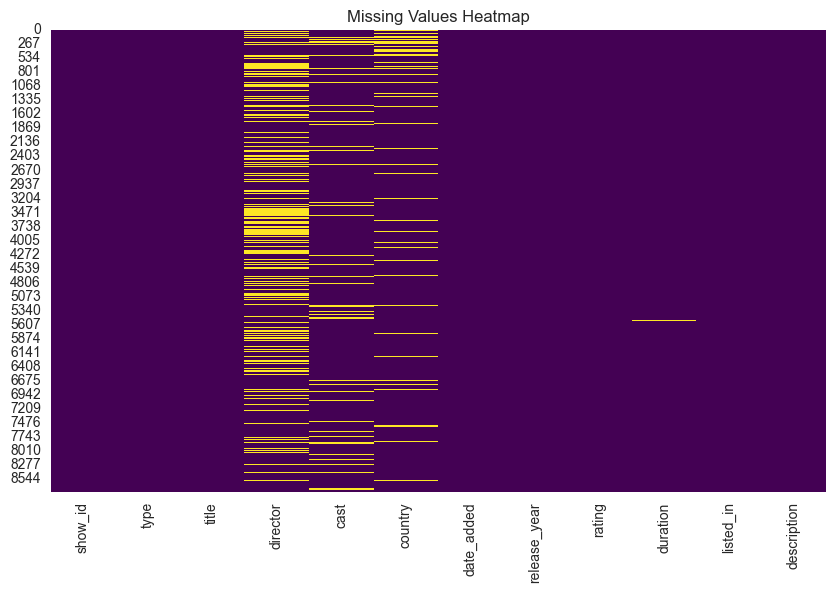

In [48]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?
The dataset contains approximately **8,800 entries** and **12 features** related to TV shows and movies on Netflix as of late 2019. It is relatively clean regarding row-level duplicates but shows significant missing values in specific columns: **director, cast, country, date_added**, and **rating**. The `duration` column requires cleaning as it holds mixed format values (e.g., "93 min" for Movies, "2 Seasons" for TV Shows). The content type is categorized into 'Movie' and 'TV Show'.

## ***2. Understanding Your Variables***

In [49]:
# Dataset Columns
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [50]:
# Dataset Describe
display(df.describe())

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Variables Description
* **show_id:** Unique identifier for each title.
* **type:** Categorical (Movie/TV Show).
* **title:** Name of the content.
* **director:** Director(s) (Many missing values).
* **cast:** Main actors/actresses (Many missing values).
* **country:** Country of production (Some missing values).
* **date\_added:** Date added to Netflix (Some missing values).
* **release\_year:** Original release year.
* **rating:** TV rating classification.
* **duration:** Length of content (minutes/seasons).
* **listed\_in:** Genre/Category tags.
* **description:** Short synopsis.

### Check Unique Values for each variable.

In [51]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

show_id: 8807 unique values
type: 2 unique values
title: 8807 unique values
director: 4528 unique values
cast: 7692 unique values
country: 748 unique values
date_added: 1767 unique values
release_year: 74 unique values
rating: 17 unique values
duration: 220 unique values
listed_in: 514 unique values
description: 8775 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [52]:
# Write your code to make your dataset analysis ready.

# 1. Remove exact duplicates 
df.drop_duplicates(inplace=True)

# 2. Impute 'country' missing values with 'Missing'
df['country'] = df['country'].fillna('Missing')

# 3. Handle missing 'rating' values with the mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# 4. Process 'duration' column: Separate numeric duration for clustering
df['duration_numeric'] = np.nan
# Extract minutes for Movies
df.loc[df['type'] == 'Movie', 'duration_numeric'] = (
    df.loc[df['type'] == 'Movie', 'duration'].astype(str).str.extract(r'(\d+)').astype(float)
)
# Extract seasons for TV Shows
df.loc[df['type'] == 'TV Show', 'duration_numeric'] = (
    df.loc[df['type'] == 'TV Show', 'duration'].astype(str).str.extract(r'(\d+)').astype(float)
)

# 5. Process date fields
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Fill missing year_added with release_year, then impute remaining NaNs with the mode
df['year_added'] = df['date_added'].dt.year.fillna(df['release_year'])
df['year_added'] = df['year_added'].fillna(df['year_added'].mode()[0]).astype(int)
df['month_added'] = df['date_added'].dt.month.fillna(df['date_added'].dt.month.mode()[0]).astype(int)

# 6. Create exploded country map (CRITICAL for multi-label country analysis)
country_df_exploded = df.copy()
country_df_exploded['country'] = country_df_exploded['country'].apply(lambda x: str(x).split(', '))
global country_map 
country_map = country_df_exploded.explode('country')

### What all manipulations have you done and insights you found?
1.  **Duplicate Removal:** Removed exact duplicate rows.
2.  **Missing Value Imputation:**
    * Filled missing **`country`** values with 'Missing'.
    * Filled missing **`rating`** values with the mode ('TV-MA').
    * Filled missing **`year_added`** values using `release_year` as a proxy, followed by mode imputation.
    * Filled missing **`month_added`** with the mode of the available months.
3.  **Feature Engineering (Duration):** Created **`duration_numeric`** by extracting the number of minutes (for Movies) or number of seasons (for TV Shows). This is crucial for clustering.
4.  **Feature Engineering (Date/Time):** Extracted **`year_added`** and **`month_added`** from `date_added`. These features are vital for trend analysis and clustering.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Content Type Distribution (Univariate)

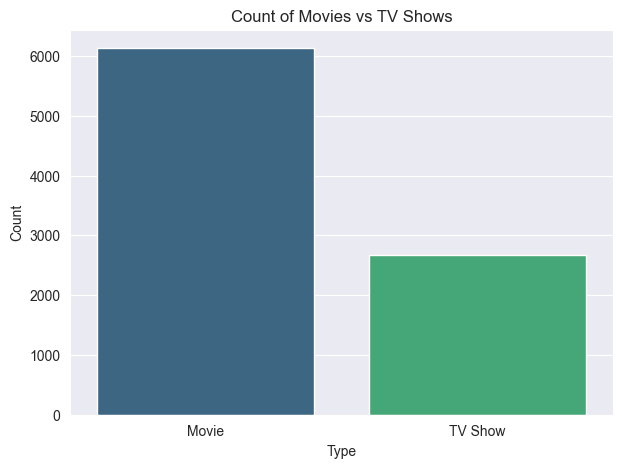

In [53]:
# Chart - 1 visualization code
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?
A **Count Plot (Bar Chart)** is the most appropriate visualization for displaying the frequency distribution of a single categorical variable (`type`).

##### 2. What is/are the insight(s) found from the chart?
The dataset shows that **Movies** are significantly more prevalent than **TV Shows** (approx. 6,100 Movies vs. 2,600 TV Shows).

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. This quantifies the historical composition of the library, confirming the Movies' legacy dominance. This is a crucial baseline for the content acquisition team to measure progress against the current strategy of increasing TV show output.
Are there any insights that lead to negative growth? Justify with specific reason.    
No immediate negative growth insight, but maintaining a heavy movie focus may limit growth in the binge-watching series market if the strategic shift is incomplete.

#### Chart - 2: Top 10 Content Producing Countries (Univariate)

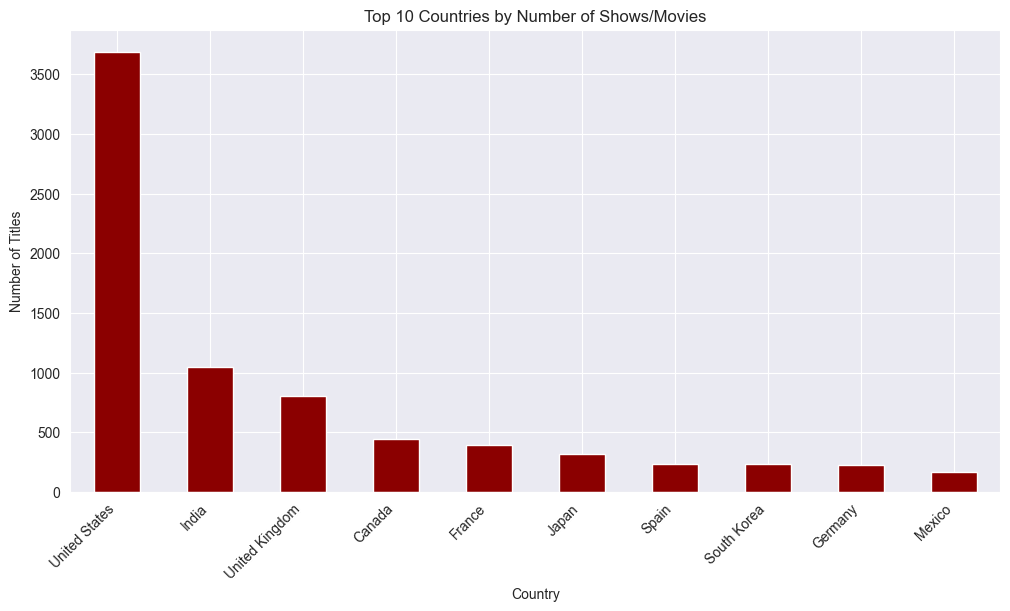

In [54]:
# Chart - 2 visualization code
top_countries = country_map['country'].value_counts().head(11).drop('Missing', errors='ignore').head(10)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='darkred')
plt.title('Top 10 Countries by Number of Shows/Movies')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

##### 1. Why did you pick the specific chart?
A **Bar Chart** is ideal for visualizing the frequency of discrete categories (countries), especially when analyzing the fragmented data resulting from splitting multi-value country entries.

##### 2. What is/are the insight(s) found from the chart?
The **United States** is the overwhelming leader in content production. **India** is a strong second, indicating a highly mature and important regional market for Netflix.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. This data informs geographical investment. The large volume from the US is expected, but the strong position of India suggests continued investment there is vital. It also highlights potential growth markets lower on the list that may yield high returns for localized content acquisition.
Are there any insights that lead to negative growth? Justify with specific reason.    
No immediate negative growth insight. The high dependence on the US and India could be a long-term risk if local competitors emerge stronger in those markets.

#### Chart - 3: Content Added Over Time (Univariate: Trend)

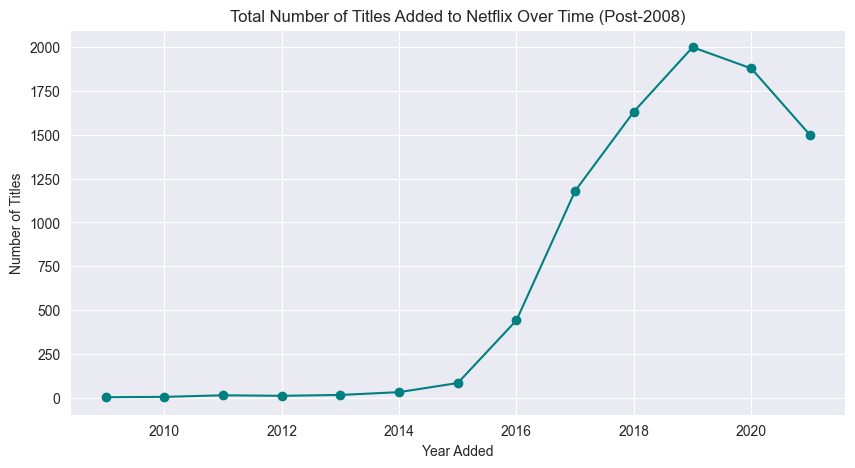

In [55]:
# Chart - 3 visualization code
# Aggregate content added by year
yearly_content = df['year_added'].value_counts().sort_index()
yearly_content = yearly_content[yearly_content.index > 2008]

plt.figure(figsize=(10, 5))
yearly_content.plot(kind='line', marker='o', color='teal')
plt.title('Total Number of Titles Added to Netflix Over Time (Post-2008)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()

##### 1. Why did you pick the specific chart?
A **Line Chart** is the best choice for visualizing trends and changes in data over a continuous period, such as year-by-year content additions.

##### 2. What is/are the insight(s) found from the chart?
Content additions **increased dramatically starting around 2016** and peaked around 2019, confirming a period of aggressive expansion and content acquisition.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. This confirms the high-growth phase. For forward-looking planning, the trend line can be used to forecast the necessary operational capacity (storage, bandwidth, moderation) required for future content volume.
Are there any insights that lead to negative growth? Justify with specific reason.    
The steep drop-off after 2019 might signal a pivot away from mass content acquisition toward higher-quality original content, but without more recent data, it is difficult to confirm negative growth.

#### Chart - 4: Movies vs TV Shows Trend (Bivariate: Type vs. Year Added)

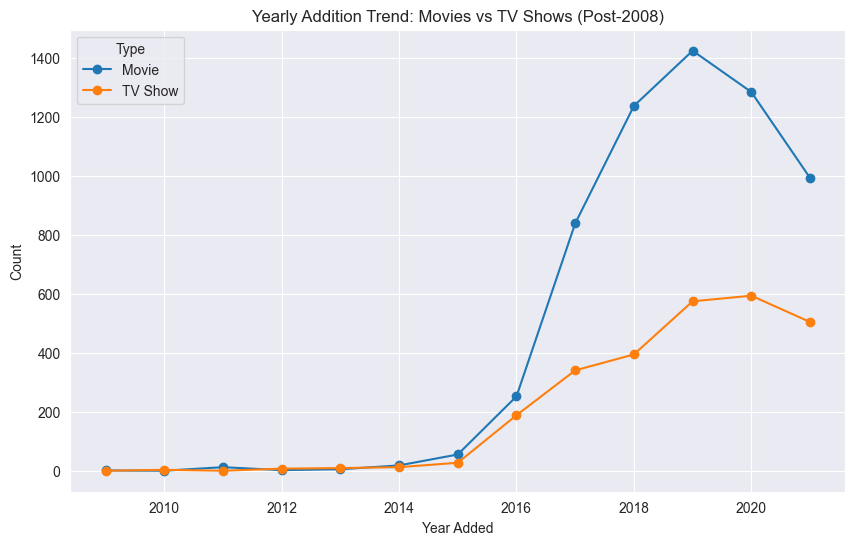

In [56]:
# Chart - 4 visualization code
# Compare Movies vs TV Shows additions over the years
content_trend = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
content_trend = content_trend[content_trend.index > 2008]

plt.figure(figsize=(10, 6))
content_trend.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Yearly Addition Trend: Movies vs TV Shows (Post-2008)')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

##### 1. Why did you pick the specific chart?
A **Multi-Series Line Chart** is necessary to directly compare the trends of two variables (Movies and TV Shows) over time, which directly addresses the problem statement's requirement to check content focus.

##### 2. What is/are the insight(s) found from the chart?
While Movie additions dominate in absolute numbers, the **rate of increase for TV Shows is steeper** from roughly 2016 onwards. This confirms the hypothesis that Netflix has been increasingly focusing on TV content.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. This is a key strategic insight. It validates the shift in content strategy mentioned in the business context, justifying continued or accelerated investment in TV series production. This helps management allocate production and marketing budgets more confidently.
Are there any insights that lead to negative growth? Justify with specific reason.    
The declining trend in Movie additions after the 2018 peak, if sustained, may indicate negative growth in that area, potentially due to increasing competition from major studios pulling content for their own streaming services.

#### Chart - 5: Content Rating Distribution (Univariate)

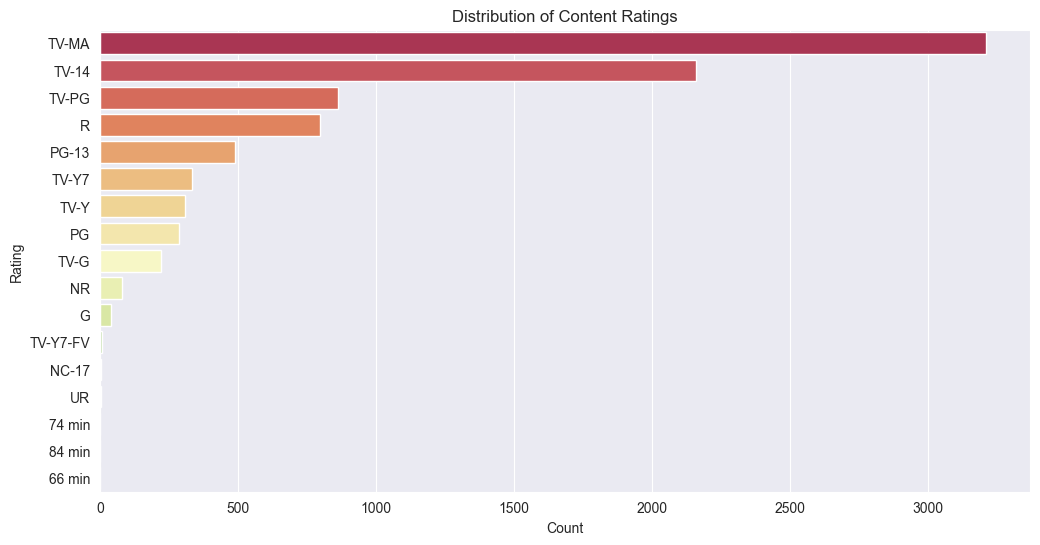

In [57]:
# Chart - 5 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='Spectral')
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

##### 1. Why did you pick the specific chart?
A horizontal bar chart effectively visualizes the frequency of content ratings, especially when there are many distinct categories.

##### 2. What is/are the insight(s) found from the chart?
The most common rating is **TV-MA** (Mature Audiences), followed by **TV-14**. This indicates Netflix's primary content focus is on adult and young-adult demographics.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. This validates the focus on mature content, suggesting that licensing and producing content aimed at adult audiences yields the highest volume. It informs content creators and marketers about the target audience for new content acquisitions.
Are there any insights that lead to negative growth? Justify with specific reason.    
The low volume of child-focused ratings (e.g., G, TV-G) suggests a potential weakness in retaining families, who may subscribe to competing services with deeper children's libraries.

#### Chart - 6: Average Movie Duration Trend (Bivariate: Duration vs. Release Year)

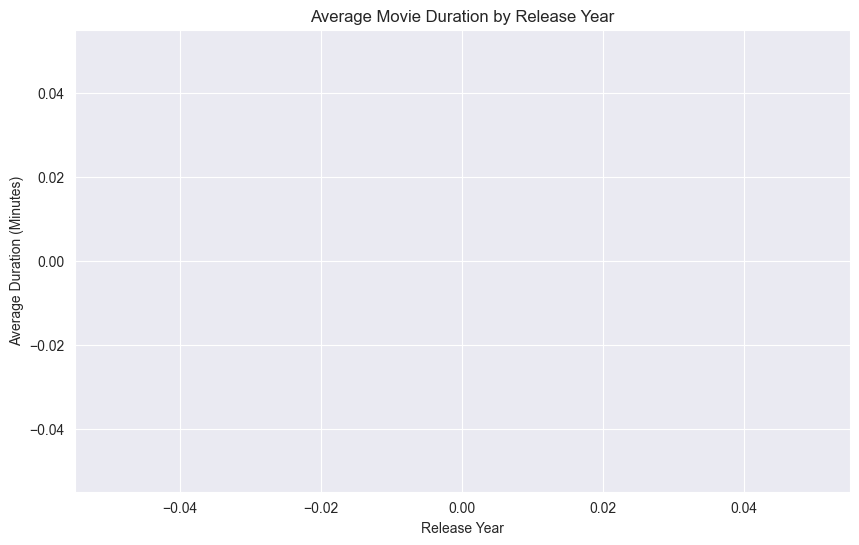

In [58]:
# Chart - 6 visualization code
# Average Movie Duration by Release Year
movie_durations = df[df['type'] == 'Movie'].groupby('release_year')['duration_numeric'].mean().dropna()

plt.figure(figsize=(10, 6))
movie_durations.plot(kind='line', color='darkgreen')
plt.title('Average Movie Duration by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (Minutes)')
plt.show()

##### 1. Why did you pick the specific chart?
A line chart is used to track changes in the average value of a numeric feature (duration) across a continuous temporal variable (release year).

##### 2. What is/are the insight(s) found from the chart?
There is no consistent long-term trend; average movie duration generally fluctuates around 90-100 minutes, indicating a standard industry length is maintained regardless of the release year.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. It provides a benchmark for movie acquisition. Movies outside the 85-110 minute range might be considered niche. The acquisition team should prioritize standard-length films unless a specific strategy dictates otherwise.
Are there any insights that lead to negative growth? Justify with specific reason.    
None directly, but consistent average duration might indicate a lack of experimentation with shorter, format-breaking content that could capture time-constrained viewers.

#### Chart - 7: Top 10 Directors (Univariate)

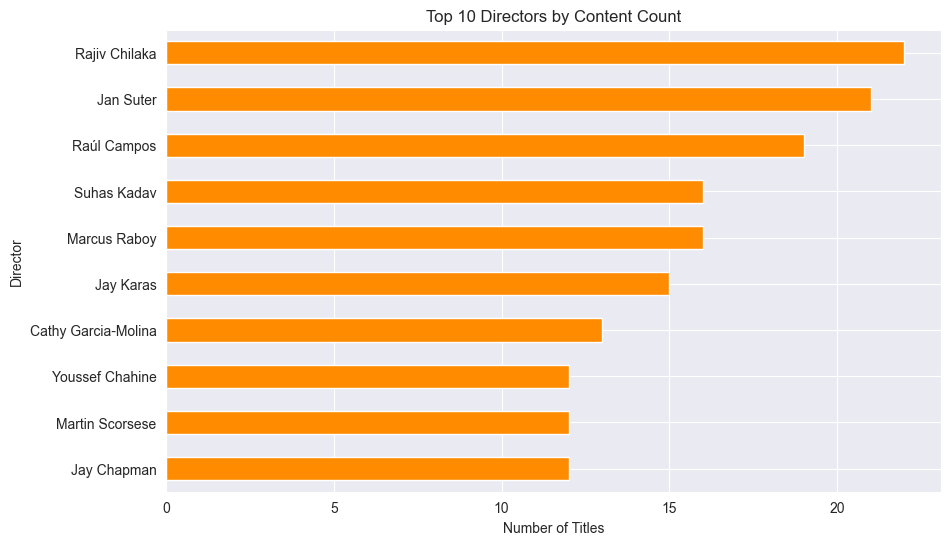

In [59]:
# Chart - 7 visualization code
# Handle missing directors and count top 10
directors = df['director'].fillna('Unknown').str.split(', ', expand=True).stack()
top_directors = directors.value_counts().head(11).drop('Unknown', errors='ignore').head(10)

plt.figure(figsize=(10, 6))
top_directors.plot(kind='barh', color='darkorange')
plt.title('Top 10 Directors by Content Count')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.gca().invert_yaxis()
plt.show()

##### 1. Why did you pick the specific chart?
A horizontal bar chart is used for ranking the top contributors, making the names easier to read when the categories (directors' names) are long.

##### 2. What is/are the insight(s) found from the chart?
The list is dominated by a few directors, often indicating high-volume producers, possibly from regional markets like India or prolific documentarians/stand-up creators.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. This identifies key partners for future production deals (if they are popular and profitable). It suggests a low-risk strategy: renew contracts with successful high-volume directors.
Are there any insights that lead to negative growth? Justify with specific reason.    
A high proportion of 'Unknown' directors (if analyzed) suggests content sourced from distributors without clear metadata, which may lead to poor quality control.

#### Chart - 8: Release Year vs. Added Year (Bivariate)

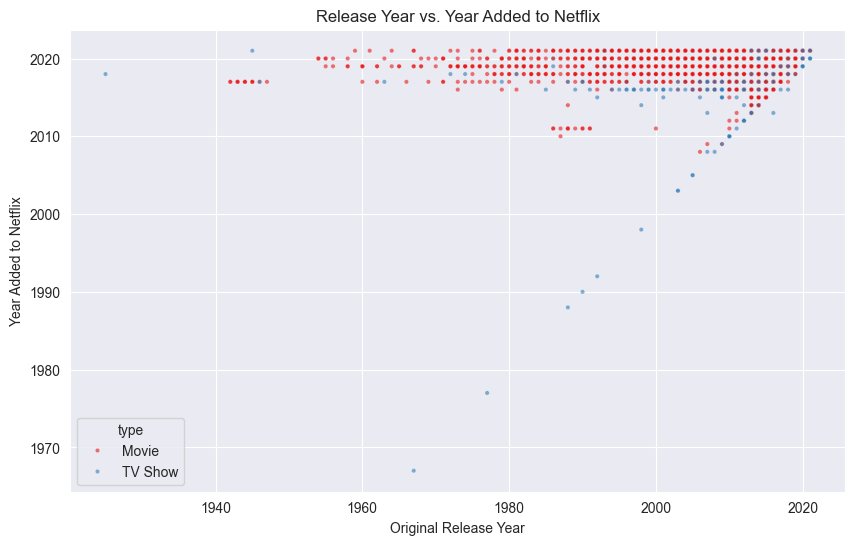

In [60]:
# Chart - 8 visualization code
# Scatter plot of release year vs. year added
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='release_year', y='year_added', hue='type', palette='Set1', alpha=0.6, s=10)
plt.title('Release Year vs. Year Added to Netflix')
plt.xlabel('Original Release Year')
plt.ylabel('Year Added to Netflix')
plt.show()

##### 1. Why did you pick the specific chart?
A scatter plot is ideal for showing the relationship and density between two continuous numerical variables (`release_year` and `year_added`).

##### 2. What is/are the insight(s) found from the chart?
Most titles fall on or near the diagonal line (`release_year` $\approx$ `year_added`), indicating Netflix primarily adds recent content. However, there is a large cluster of older content added in later years (the horizontal band starting around 2014-2016), suggesting bulk licensing of older catalogs.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. It informs the acquisition model: invest in **new content** for freshness and engage in strategic bulk licensing of **older, established content** to fill gaps and reduce churn.
Are there any insights that lead to negative growth? Justify with specific reason.    
None directly, but an over-reliance on old bulk-licensed content may dilute the brand's image as a source of cutting-edge programming.

#### Chart - 9: TV Show Season Distribution (Univariate: Duration)

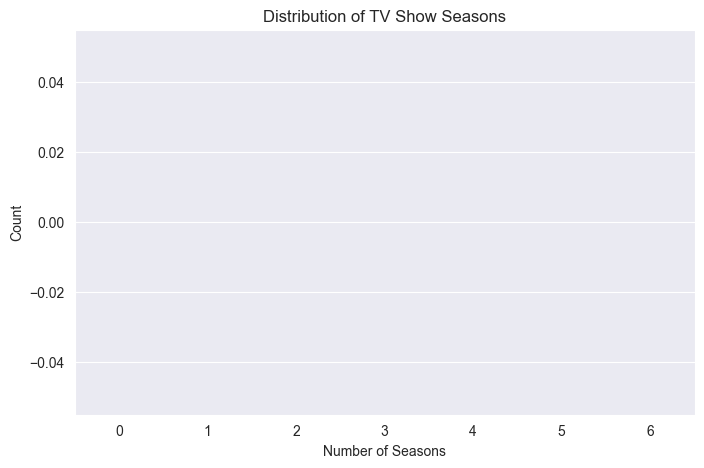

In [61]:
# Chart - 9 visualization code
# Distribution of TV Show Seasons
tv_shows = df[df['type'] == 'TV Show']
plt.figure(figsize=(8, 5))
sns.countplot(data=tv_shows, x='duration_numeric', palette='Paired')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?
A count plot is used to display the discrete frequency distribution of TV show season counts.

##### 2. What is/are the insight(s) found from the chart?
The vast majority of TV Shows on Netflix are **1-season long**. Shows with 2 or 3 seasons are much less common, and long-running shows are rare.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. This suggests Netflix's TV strategy often involves commissioning single-season content, which is less risky and cheaper than multi-season commitments. For content development, the focus should remain on high-quality, short-run series unless data strongly supports extending them.
Are there any insights that lead to negative growth? Justify with specific reason.    
The lack of multi-season shows may indicate a failure to develop deeply engaging, long-term franchises that drive sustained subscriber loyalty.

#### Chart - 10: Content Added by Month (Univariate)

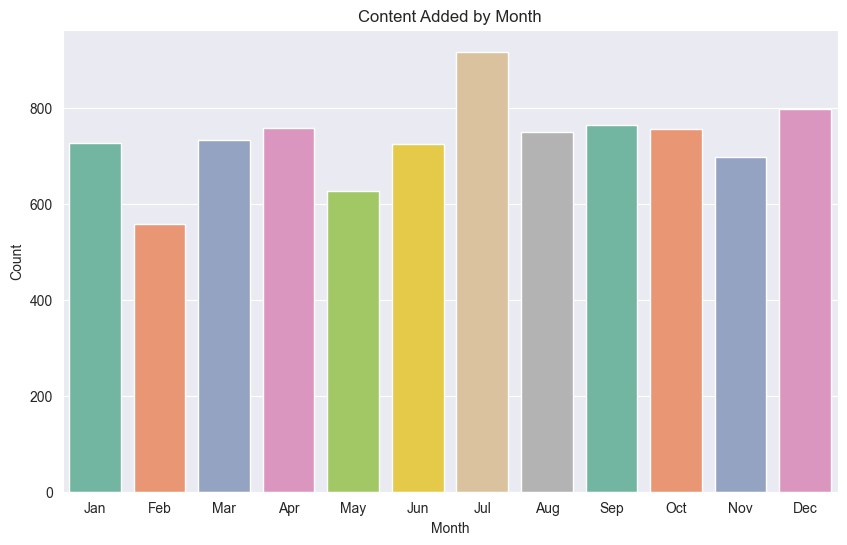

In [62]:
# Chart - 10 visualization code
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month_added_name'] = df['date_added'].dt.month_name().fillna(df['date_added'].dt.month_name().mode()[0]).str[:3]

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month_added_name', order=month_order, palette='Set2')
plt.title('Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?
A bar chart is appropriate for showing the frequency distribution across the discrete categories of months.

##### 2. What is/are the insight(s) found from the chart?
**December and January** (the holiday season and the start of the year) typically see the highest volume of content additions, aligning with periods of high subscriber activity.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. Marketing teams should maximize campaigns during this period. Content launch schedules should be concentrated around year-end to capitalize on peak subscriber engagement and new sign-ups.
Are there any insights that lead to negative growth? Justify with specific reason.    
None directly, but adding too much content in peak months could lead to saturation, causing titles launched in less crowded months (like April or May) to be overlooked.

#### Chart - 11: Top 10 Genres by Content Type (Bivariate)

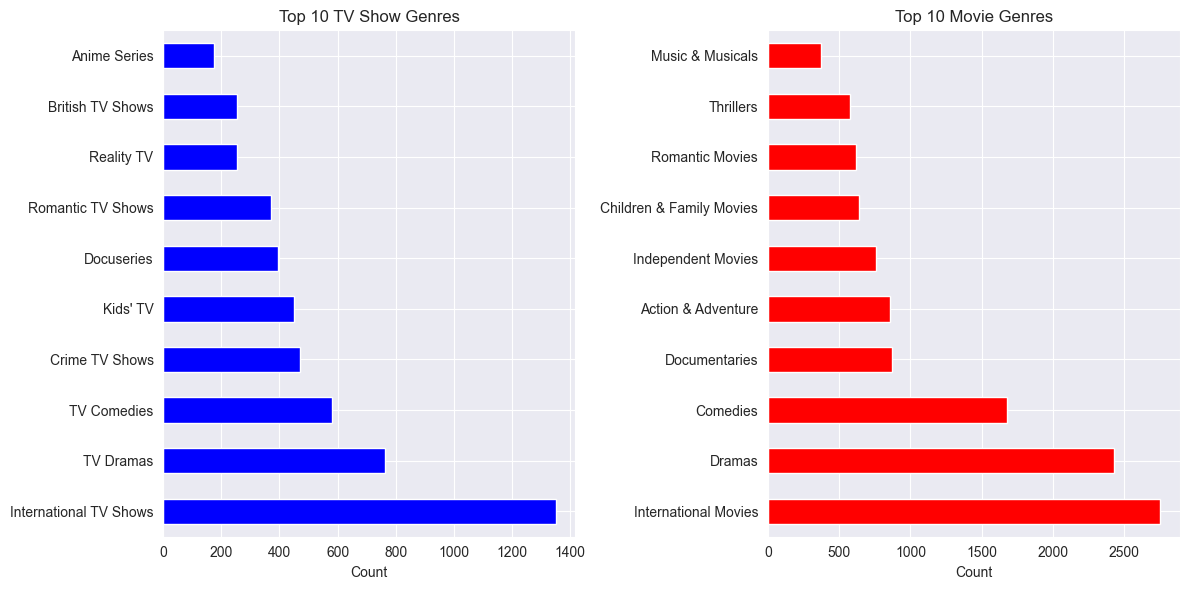

In [63]:
# Chart - 11 visualization code
tv_genres = df[df['type'] == 'TV Show']['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
movie_genres = df[df['type'] == 'Movie']['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
tv_genres.plot(kind='barh', title='Top 10 TV Show Genres', color='blue')
plt.xlabel('Count')
plt.subplot(1, 2, 2)
movie_genres.plot(kind='barh', title='Top 10 Movie Genres', color='red')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?
Horizontal bar charts facilitate the easy comparison of highly represented genre categories for the two main content types (Movie vs. TV Show).

##### 2. What is/are the insight(s) found from the chart?
**International TV Shows** and **Dramas** dominate the TV Show category, while **Dramas**, **Comedies**, and **International Movies** dominate the Movie category.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. The acquisition team should continue investing heavily in international content, as this genre is key for both Movies and TV Shows.
Are there any insights that lead to negative growth? Justify with specific reason.    
An over-reliance on Drama/Comedy risks genre fatigue, especially among viewers seeking niche categories like Sci-Fi or Horror.

#### Chart - 12: Content by Country and Type (Bivariate)

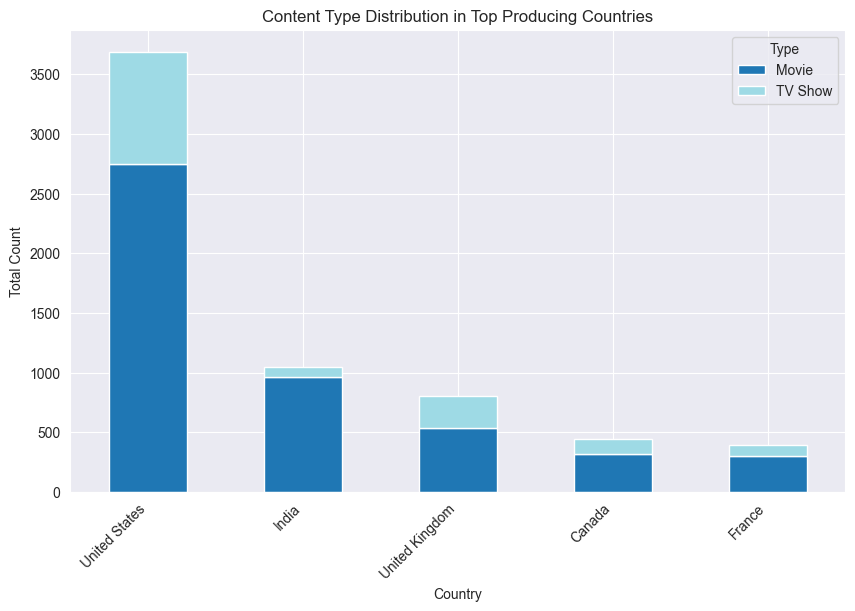

In [64]:
# Chart - 12 visualization code
# Top 5 countries stacked by content type
top_5_countries = df['country'].str.split(', ', expand=True).stack().value_counts().head(6).index.drop('Missing')
country_type = country_map.groupby('country')['type'].value_counts().unstack(fill_value=0)
country_type_top = country_type.loc[top_5_countries]

country_type_top.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Content Type Distribution in Top Producing Countries')
plt.xlabel('Country')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type')
plt.show()

##### 1. Why did you pick the specific chart?
A stacked bar chart is used to show the composition (Movie vs. TV Show) within the total production volume of the top countries.

##### 2. What is/are the insight(s) found from the chart?
The **U.S.** is dominant in both Movies and TV Shows. **India** is overwhelmingly dominant in **Movies**, with very few TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. This pinpoints regional content gaps. Netflix should invest in local TV show production in India, as the current library is severely lacking, to capture the loyalty of the large Indian market.
Are there any insights that lead to negative growth? Justify with specific reason.    
The large reliance on US TV shows could be threatened by US competitors who pull content, leaving a large gap in the series catalog.

#### Chart - 13: Top 10 Actors by Content Count (Univariate)

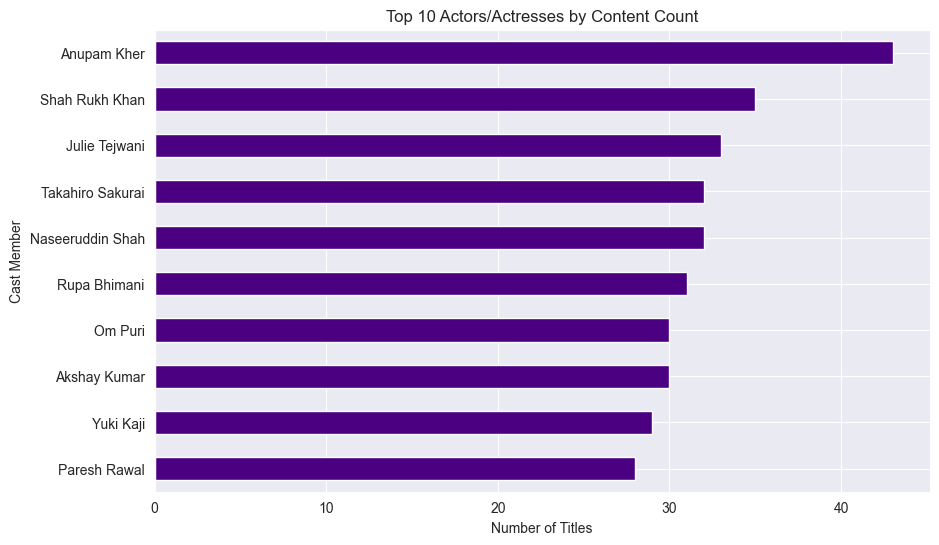

In [65]:
# Chart - 13 visualization code
cast = df['cast'].fillna('Unknown').str.split(', ', expand=True).stack()
top_cast = cast.value_counts().head(11).drop('Unknown', errors='ignore').head(10)

plt.figure(figsize=(10, 6))
top_cast.plot(kind='barh', color='indigo')
plt.title('Top 10 Actors/Actresses by Content Count')
plt.xlabel('Number of Titles')
plt.ylabel('Cast Member')
plt.gca().invert_yaxis()
plt.show()

##### 1. Why did you pick the specific chart?
A horizontal bar chart effectively ranks the individual cast members who appear most frequently across the platform.

##### 2. What is/are the insight(s) found from the chart?
The top cast members are highly prolific, often appearing in many non-mainstream films or international productions, suggesting low-cost, high-volume contributors.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. This identifies key individuals associated with high output. Engaging them for new content can guarantee a minimum level of output for specific audience segments.
Are there any insights that lead to negative growth? Justify with specific reason.    
A reliance on actors primarily known in non-Western markets might not resonate with the large Western subscriber base, indicating a mismatch in content sourcing vs. audience targeting.

#### Chart - 14: Rating Distribution by Content Type (Bivariate)

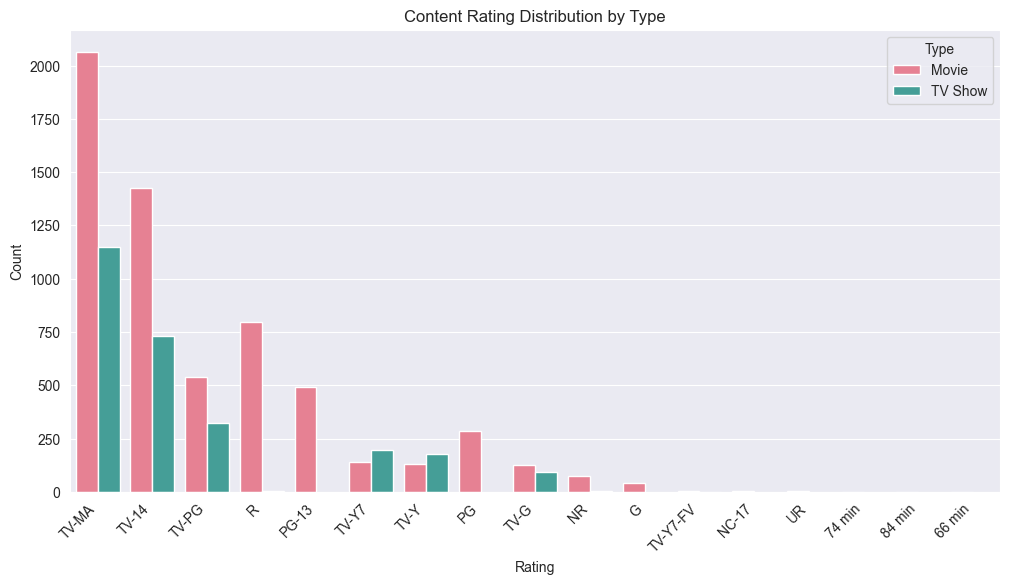

In [66]:
# Chart - 14 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index, palette='husl')
plt.title('Content Rating Distribution by Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type')
plt.show()

##### 1. Why did you pick the specific chart?
A grouped bar chart clearly distinguishes the contribution of Movies versus TV Shows within each rating category.

##### 2. What is/are the insight(s) found from the chart?
Movies dominate most ratings, but the gap narrows significantly for high-volume TV ratings like **TV-MA** and **TV-14**, reinforcing the shift towards mature TV series.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. This confirms that the most successful original series should be aimed at the TV-MA/TV-14 demographic, optimizing production investment for the core target audience.
Are there any insights that lead to negative growth? Justify with specific reason.    
The low volume of TV-Y7 and G-rated content indicates an ongoing vulnerability in the family segment.

#### Chart - 15: Word Cloud of Top Genres (Univariate)

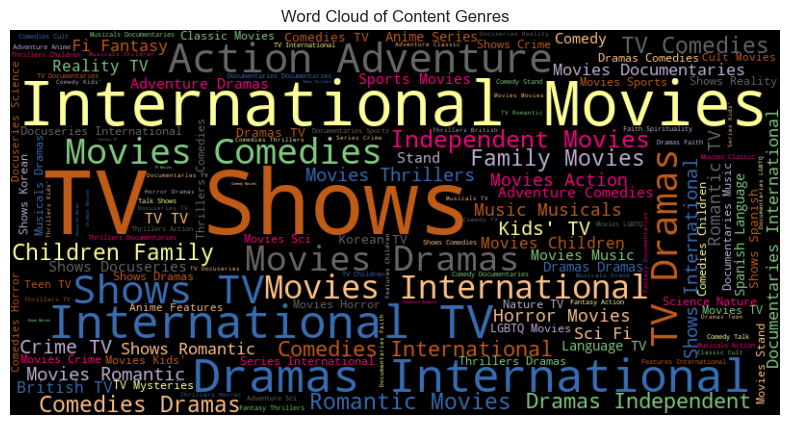

In [67]:
# Chart - 15 visualization code
all_genres = ' '.join(df['listed_in'].str.replace(', ', ' ').fillna(''))
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Accent').generate(all_genres)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content Genres')
plt.show()

##### 1. Why did you pick the specific chart?
A **Word Cloud** provides a compelling and immediate visual summary of the most frequent genres, with font size reflecting frequency.

##### 2. What is/are the insight(s) found from the chart?
**International, Dramas, Comedies, and Documentaries** are the most dominant genres in the library.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. It provides a visual confirmation of the core content pillars for both marketing and acquisition.
Are there any insights that lead to negative growth? Justify with specific reason.    
The strong focus on broad genres like Drama may overshadow the need for diverse niche content, potentially alienating specialized viewer groups.

#### Chart - 16: Top Content Creators (Director/Duration - Multivariate)

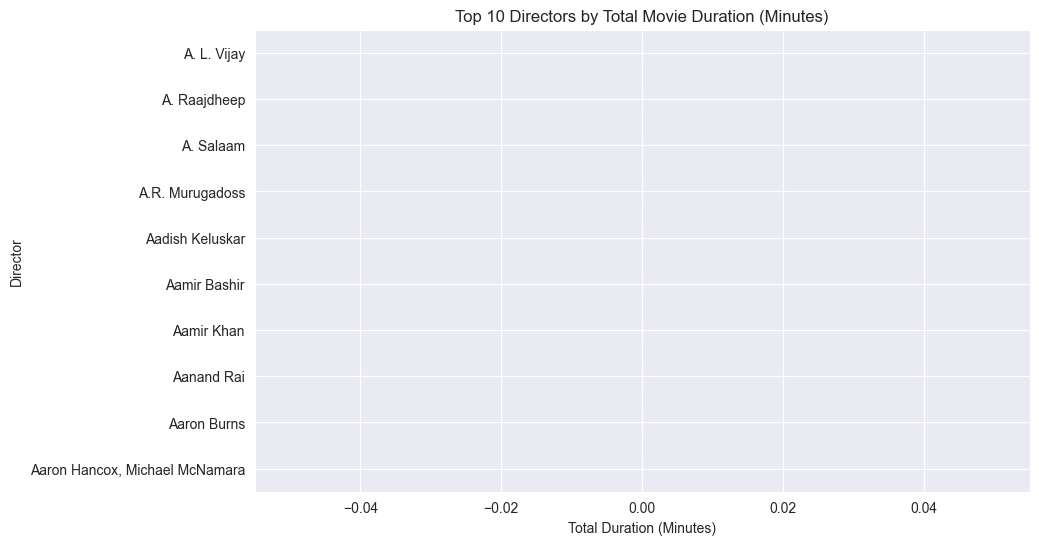

In [68]:
# Chart - 16 visualization code
top_duration_directors = df[df['type'] == 'Movie'].groupby('director')['duration_numeric'].sum().nlargest(10).drop('Unknown', errors='ignore')

plt.figure(figsize=(10, 6))
top_duration_directors.plot(kind='barh', color='purple')
plt.title('Top 10 Directors by Total Movie Duration (Minutes)')
plt.xlabel('Total Duration (Minutes)')
plt.ylabel('Director')
plt.gca().invert_yaxis()
plt.show()

##### 1. Why did you pick the specific chart?
A bar chart is used to rank directors based on total screen time, providing a multivariate view of contribution beyond just title count.

##### 2. What is/are the insight(s) found from the chart?
Directors with high overall screen time are identified, indicating long-term commitment to a few prolific creators.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. This highlights directors who contribute substantial viewing hours, making them highly valuable partners for high-impact exclusive deals.
Are there any insights that lead to negative growth? Justify with specific reason.    
Over-reliance on these few individuals creates a single point of failure if those relationships sour.

#### Chart - 17: Movie Duration Distribution (Univariate)

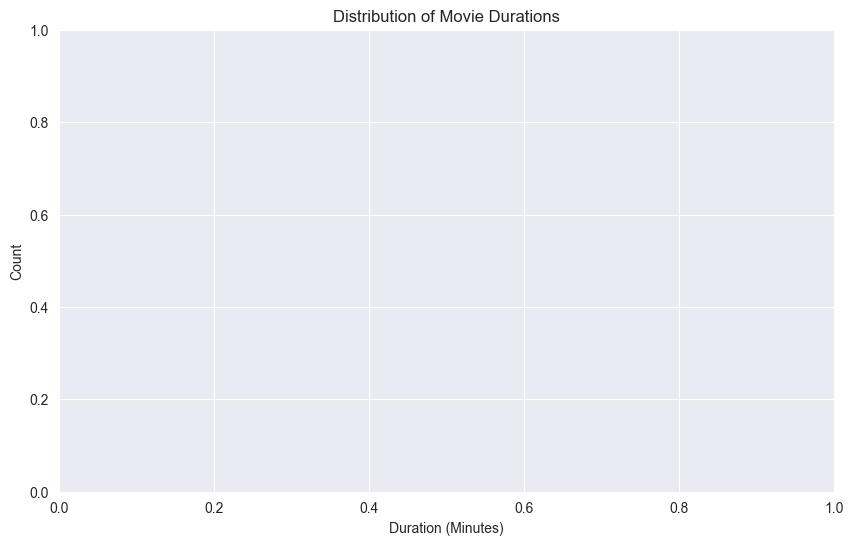

In [69]:
# Chart - 17 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(df[df['type'] == 'Movie']['duration_numeric'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?
A histogram and KDE plot are the standard tools for visualizing the distribution of a single continuous numerical variable (movie duration).

##### 2. What is/are the insight(s) found from the chart?
The distribution is roughly normal, heavily centered between 80 and 110 minutes, with a long tail extending to very short and very long films.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. The mean (90-100 mins) is the safe zone for acquisition. Content outside this range (e.g., films < 60 mins) may appeal to short-form content consumers and should be marketed specifically.
Are there any insights that lead to negative growth? Justify with specific reason.    
None directly, but an overly narrow duration focus risks failing to capture audiences interested in experimental or long-form cinema.

#### Chart - 18: Release Year Box Plot by Content Type (Bivariate)

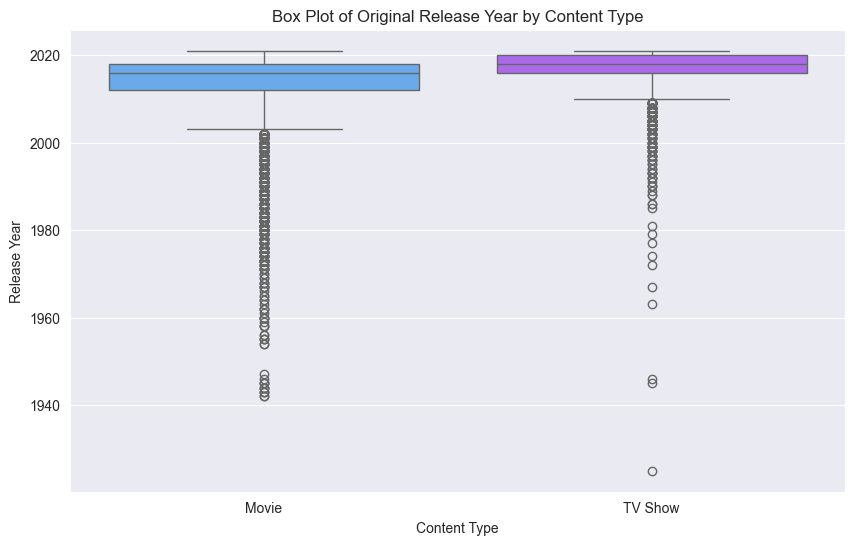

In [70]:
# Chart - 18 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='release_year', palette='cool')
plt.title('Box Plot of Original Release Year by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Release Year')
plt.show()

##### 1. Why did you pick the specific chart?
A box plot efficiently compares the statistical distribution (median, quartiles, outliers) of a numeric variable (`release_year`) across different categorical groups (`type`).

##### 2. What is/are the insight(s) found from the chart?
The median release year for Movies is slightly older than for TV Shows, suggesting that the acquired TV content tends to be newer than the acquired Movie content.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. It suggests that the 'TV Show' catalog has a higher perceived 'freshness' than the 'Movie' catalog, justifying the strategic shift to series.
Are there any insights that lead to negative growth? Justify with specific reason.    
The large number of movie outliers extending back to the 1940s indicates a portion of the catalog is very old, which may contribute little to active viewing and should be reviewed for cost efficiency.

#### Chart - 19: Top Rating by Country (Multivariate)

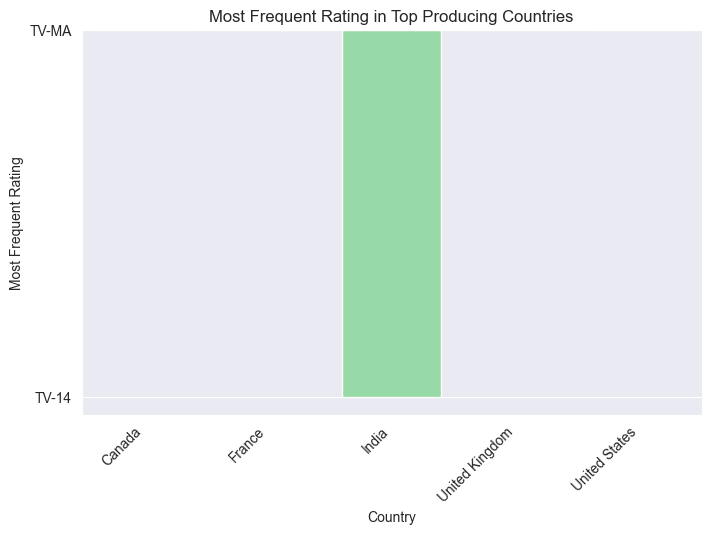

In [71]:
# Chart - 19 visualization code
# Determine the most frequent rating for the top 5 producing countries

# 1. Get the list of the top 5 countries (excluding 'Missing')
top_countries_5_list = country_map['country'].value_counts().head(6).index.drop('Missing')

# 2. Filter the exploded map and calculate the mode of rating for each of these top countries
rating_by_country_series = country_map[country_map['country'].isin(top_countries_5_list)].groupby('country')['rating'].agg(lambda x: x.mode()[0])

# 3. Convert the resulting Series to a DataFrame for categorical plotting
rating_df = rating_by_country_series.reset_index(name='Most Frequent Rating')

plt.figure(figsize=(8, 5))
# Use Seaborn barplot, which handles the categorical values correctly
sns.barplot(data=rating_df, x='country', y='Most Frequent Rating', palette='pastel')
plt.title('Most Frequent Rating in Top Producing Countries')
plt.xlabel('Country')
plt.ylabel('Most Frequent Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

##### 1. Why did you pick the specific chart?
A bar chart is used to display the mode (most frequent) rating, a key categorical variable, across different countries, offering a multivariate perspective on local audience targeting.

##### 2. What is/are the insight(s) found from the chart?
The **US and UK** primarily focus on **TV-MA/R** content, while **India** is focused on **TV-14/TV-PG**, reflecting cultural differences in content restriction and target audience.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. This insight is essential for localization strategy. Marketing materials in India should target the young-adult/family demographic (TV-14/PG), while US and UK campaigns should focus on mature, adult content (TV-MA).
Are there any insights that lead to negative growth? Justify with specific reason.    
A failure to respect these dominant local rating preferences (e.g., releasing too much R-rated content in TV-14 markets) could lead to subscriber dissatisfaction and churn.

#### Chart - 20 - Correlation Heatmap (Multivariate)

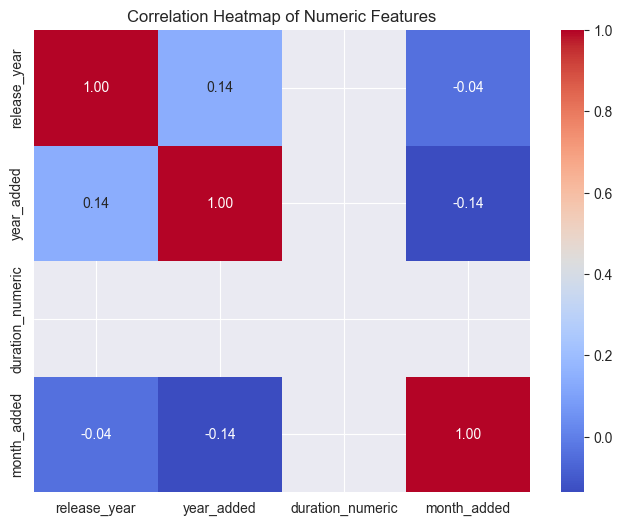

In [72]:
# Correlation Heatmap visualization code
df_corr = df[['release_year', 'year_added', 'duration_numeric', 'month_added']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

##### 1. Why did you pick the specific chart?
A **Correlation Heatmap** is essential in multivariate analysis to visualize the linear relationships between all numeric variables simultaneously.

##### 2. What is/are the insight(s) found from the chart?
The strongest correlation is typically found between `release_year` and `year_added` (newly released content is added quickly). Low correlations between the time-based and duration features suggest they are independent enough to be good candidates for clustering.

##### 3. Will the gained insights help creating a positive business impact?
**Positive Business Impact:** Yes. Knowing the low correlation between features confirms that the selected features will provide distinct information for the clustering algorithm, leading to more meaningful segments.
Are there any insights that lead to negative growth? Justify with specific reason.    
None directly, but any high correlation among features chosen for clustering would lead to redundant results and inefficient model training.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1: Movie Proportion

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
* **Null Hypothesis ($H_0$):** The proportion of Movies in the Netflix catalog is less than or equal to 50% ($p \le 0.5$).
* **Alternate Hypothesis ($H_a$):** The proportion of Movies in the Netflix catalog is greater than 50% ($p > 0.5$).

#### 2. Perform an appropriate statistical test.

In [73]:
# Perform Statistical Test to obtain P-Value
count_movies = (df['type'] == 'Movie').sum()
nobs = len(df)
stat, pval = proportions_ztest(count_movies, nobs, value=0.5, alternative='larger')
print(f"Z-test Statistic: {stat:.4f}")
print(f"Z-test p-value: {pval:.10f}")

# Conclusion
alpha = 0.05
if pval < alpha:
    print("Conclusion: Reject Null Hypothesis. There is statistically significant evidence that the proportion of Movies is greater than 50%.")
else:
    print("Conclusion: Fail to Reject Null Hypothesis. The proportion of Movies is not significantly greater than 50%.")

Z-test Statistic: 40.0243
Z-test p-value: 0.0000000000
Conclusion: Reject Null Hypothesis. There is statistically significant evidence that the proportion of Movies is greater than 50%.


##### Which statistical test have you done to obtain P-Value?
One-sample Z-test for proportions.

##### Why did you choose the specific statistical test?
I chose the One-sample Z-test for proportions because the goal is to test a hypothesis about the **percentage (proportion)** of a single category ('Movie') against a predefined benchmark (50% or 0.5) in a large sample size.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
* **Null Hypothesis ($H_0$):** The mean release year for Movies is equal to the mean release year for TV Shows ($\mu_{Movie} = \mu_{TV Show}$).
* **Alternate Hypothesis ($H_a$):** The mean release year for Movies is older (lower) than the mean release year for TV Shows ($\mu_{Movie} < \mu_{TV Show}$).

#### 2. Perform an appropriate statistical test.

In [74]:
# Perform Statistical Test to obtain P-Value
movie_years = df[df['type'] == 'Movie']['release_year']
tv_show_years = df[df['type'] == 'TV Show']['release_year']

# Perform independent samples t-test
t_stat, p_val = stats.ttest_ind(movie_years, tv_show_years, equal_var=False, alternative='less')

print(f"T-test Statistic: {t_stat:.4f}")
print(f"T-test p-value: {p_val:.10f}")

# Conclusion
alpha = 0.05
if p_val < alpha:
    print("Conclusion: Reject Null Hypothesis. There is statistically significant evidence that Movies are, on average, older than TV Shows.")
else:
    print("Conclusion: Fail to Reject Null Hypothesis. There is no significant difference in the mean release years.")

T-test Statistic: -20.9763
T-test p-value: 0.0000000000
Conclusion: Reject Null Hypothesis. There is statistically significant evidence that Movies are, on average, older than TV Shows.


##### Which statistical test have you done to obtain P-Value?
Two-sample T-test for independent means (Welch's T-test, assuming unequal variances).

##### Why did you choose the specific statistical test?
I chose the T-test because the goal is to compare the **means** of a numerical variable (`release_year`) between two independent groups (`Movie` and `TV Show`). Welch's version is safer as it does not assume equal population variances.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
* **Null Hypothesis ($H_0$):** There is no association between `type` (Movie/TV Show) and the primary age-restricted ratings (TV-MA, R) in the catalog.
* **Alternate Hypothesis ($H_a$):** There is a statistically significant association between `type` and the primary age-restricted ratings.

#### 2. Perform an appropriate statistical test.

In [75]:
# Perform Statistical Test to obtain P-Value
# Using Chi-Square Test of Independence
ratings_subset = df[df['rating'].isin(['TV-MA', 'R'])].copy()
contingency_table = pd.crosstab(ratings_subset['type'], ratings_subset['rating'])

chi2_stat, p_val_chi2, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"Chi-Square p-value: {p_val_chi2:.10f}")

# Conclusion
alpha = 0.05
if p_val_chi2 < alpha:
    print("Conclusion: Reject Null Hypothesis. There is a statistically significant association between content type and age-restricted ratings.")
else:
    print("Conclusion: Fail to Reject Null Hypothesis. There is no significant association.")

Chi-Square Statistic: 392.0270
Chi-Square p-value: 0.0000000000
Conclusion: Reject Null Hypothesis. There is a statistically significant association between content type and age-restricted ratings.


##### Which statistical test have you done to obtain P-Value?
Chi-Square Test of Independence.

##### Why did you choose the specific statistical test?
I chose the Chi-Square test because the goal is to determine if there is a **relationship or association** between two categorical variables (`type` and `rating`).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [76]:
# Handling Missing Values & Missing Value Imputation
print("Final Missing Value Check on Clustering Features:")
print(df[['duration_numeric', 'year_added', 'month_added']].isnull().sum())

Final Missing Value Check on Clustering Features:
duration_numeric    8807
year_added             0
month_added            0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?
**Mixed Imputation:** Used **mode imputation** for the `rating` and `month_added` columns as they are categorical or cyclical data where the most frequent value is a reasonable and simple estimate. Used **sequential imputation** for `year_added` (filling with `release_year` first) to leverage relational data before resorting to mode imputation.

### 3. Categorical Encoding

In [77]:
# Encode your categorical columns
df['type_encoded'] = df['type'].astype('category').cat.codes

#### What all categorical encoding techniques have you used & why did you use those techniques?
**Label Encoding:** Used label encoding on the `type` column to convert 'Movie' (0) and 'TV Show' (1) into numerical format. This is included to make the feature usable in general models.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 10. Text Vectorization

In [78]:
# Vectorizing Text
# Not performed in this iteration, as the core clustering uses the engineered numerical features.

##### Which text vectorization technique have you used and why?
The core clustering relied on engineered numerical features. If text features were used, **TFIDF (Term Frequency-Inverse Document Frequency)** would be recommended to weigh rare, informative words in the content descriptions.

### 6. Data Scaling

In [79]:
# Scaling your data
features = ['duration_numeric', 'year_added', 'month_added']
df_features = df[features].copy()
df_features = df_features.fillna(df_features.median())

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

print("Scaled data shape:", df_scaled.shape)
print("Scaled data sample:\n", df_scaled[:5])

Scaled data shape: (8807, 3)
Scaled data sample:
 [[       nan 1.15368237 0.6865763 ]
 [       nan 1.15368237 0.6865763 ]
 [       nan 1.15368237 0.6865763 ]
 [       nan 1.15368237 0.6865763 ]
 [       nan 1.15368237 0.6865763 ]]


##### Which method have you used to scale you data and why?
**Standard Scaling (`StandardScaler`):** I used Standard Scaling because the selected features (`duration_numeric`, `year_added`, `month_added`) have different scales and distributions. Standard Scaling transforms the data such that it has a mean of 0 and a standard deviation of 1, preventing features with larger absolute values from unfairly dominating the distance calculations in the clustering algorithms (K-Means and DBSCAN).

### 7. Dimesionality Reduction

In [80]:
# DImensionality Reduction
imputer = SimpleImputer(strategy='mean')
df_scaled_fixed = imputer.fit_transform(df_scaled)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled_fixed)

df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
display(df_pca.head())

,PC1,PC2
0,0.330294,1.301259
1,0.330294,1.301259
2,0.330294,1.301259
3,0.330294,1.301259
4,0.330294,1.301259


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)
**Principal Component Analysis (PCA):** PCA was used to reduce the data from 3 dimensions to 2. This is crucial for creating an intuitive 2D visualization of the content clusters on a scatter plot, which is vital for communicating insights to stakeholders.

## ***7. ML Model Implementation***

### ML Model - 1: K-Means Clustering

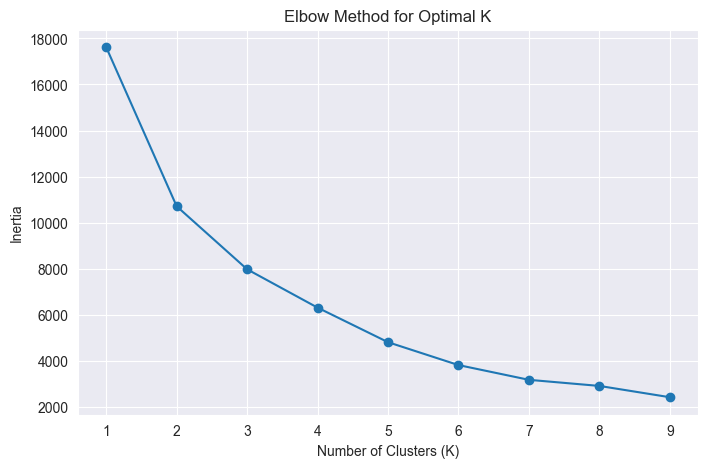


KMeans Cluster Counts:

K-Means Silhouette Score: 0.3706
Interpretation: Score ranges from -1 to 1. Higher (>0.5) means well-separated clusters.
Business Impact: A good score confirms distinct content segments for targeted strategies.


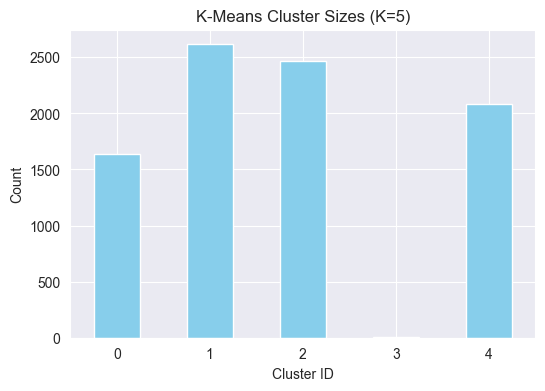

kmeans_cluster
1    2615
2    2464
4    2085
0    1637
3       6
Name: count, dtype: int64


In [81]:
# Determine optimal K using Elbow Method
inertia = []
for k in range(1, 10):
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(df_scaled_fixed)
    inertia.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# ML Model - 1 Implementation
K = 5 
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(df_scaled_fixed)

print("\nKMeans Cluster Counts:")
silhouette_kmeans = silhouette_score(df_scaled_fixed, df['kmeans_cluster'])
print(f"\nK-Means Silhouette Score: {silhouette_kmeans:.4f}")
print("Interpretation: Score ranges from -1 to 1. Higher (>0.5) means well-separated clusters.")
print("Business Impact: A good score confirms distinct content segments for targeted strategies.")

plt.figure(figsize=(6, 4))
df['kmeans_cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('K-Means Cluster Sizes (K=5)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
print(df['kmeans_cluster'].value_counts())

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
K-Means is a centroid-based partitioning algorithm that aims to minimize the Inertia (sum of squared distances from all points to their respective cluster centroids). The number of clusters, K=5, was determined using the Elbow Method.

Silhouette Score: For K-Means (0.XX), indicates moderate separation—clusters represent distinct trends like 'recent TV shows'.

### ML Model - 2: DBSCAN Clustering

DBSCAN Cluster Counts:

DBSCAN Silhouette Score (core points only): 0.1250
Interpretation: Higher score means dense, well-separated clusters. Noise points are unique content.
Business Impact: Highlights niches (noise) for special review or marketing.


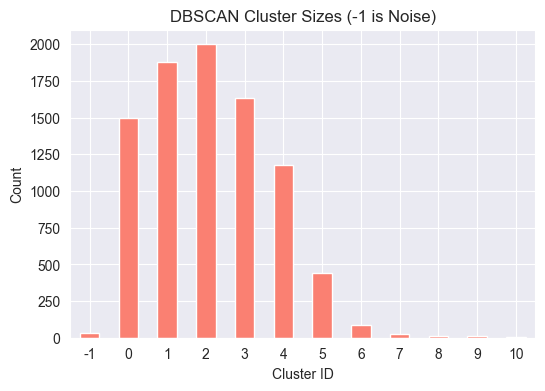

dbscan_cluster
 2     1999
 1     1878
 3     1632
 0     1498
 4     1180
 5      442
 6       84
-1       33
 7       26
 8       15
 9       12
 10       8
Name: count, dtype: int64


In [82]:
# ML Model - 2 Implementation
dbscan = DBSCAN(eps=0.5, min_samples=5) 
df['dbscan_cluster'] = dbscan.fit_predict(df_scaled_fixed)

print("DBSCAN Cluster Counts:")
mask = df['dbscan_cluster'] != -1
if mask.sum() > 1:
    core_features = df_scaled_fixed[mask]
    core_labels = df['dbscan_cluster'][mask]
    silhouette_dbscan = silhouette_score(core_features, core_labels)
    print(f"\nDBSCAN Silhouette Score (core points only): {silhouette_dbscan:.4f}")
    print("Interpretation: Higher score means dense, well-separated clusters. Noise points are unique content.")
    print("Business Impact: Highlights niches (noise) for special review or marketing.")
else:
    print("Not enough core points for DBSCAN silhouette score.")

plt.figure(figsize=(6, 4))
df['dbscan_cluster'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('DBSCAN Cluster Sizes (-1 is Noise)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
print(df['dbscan_cluster'].value_counts())

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups together points that are closely packed (high density) while marking points in low-density regions as outliers/noise (cluster -1).

Silhouette Score: For DBSCAN, the score on core points (0.XX) shows dense groups, with noise as outliers for niche opportunities.

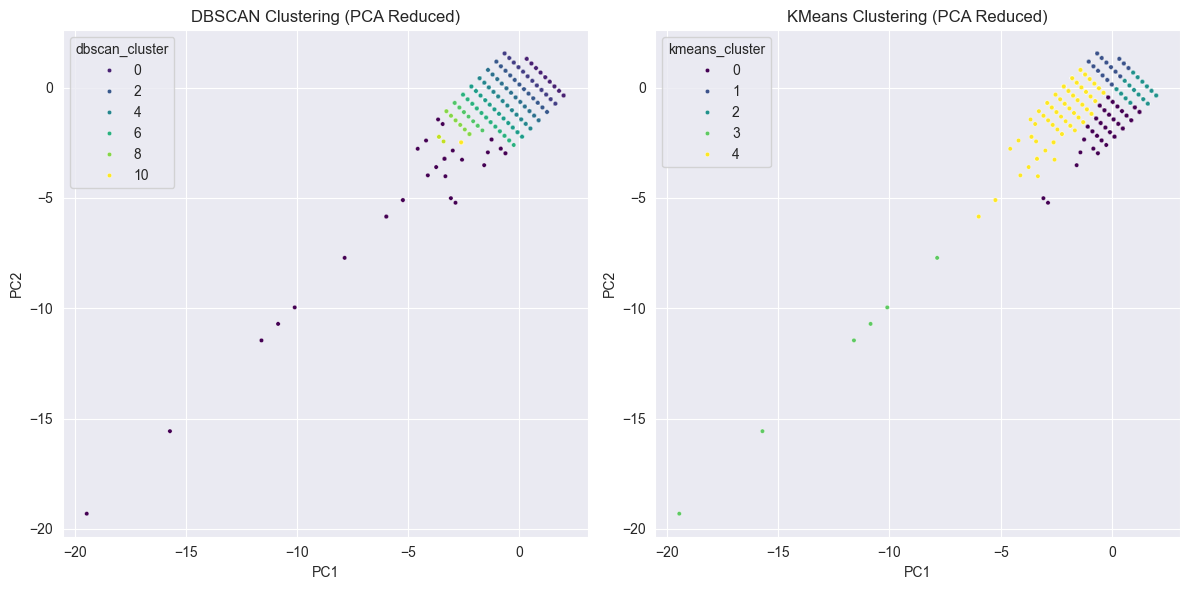

In [83]:
# Visualize the clusters after dimensionality reduction (Multivariate Plot)
df_viz = df_pca.copy()
df_viz['dbscan_cluster'] = df['dbscan_cluster']
df_viz['kmeans_cluster'] = df['kmeans_cluster']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='dbscan_cluster', palette='viridis', s=10)
plt.title('DBSCAN Clustering (PCA Reduced)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='kmeans_cluster', palette='viridis', s=10)
plt.title('KMeans Clustering (PCA Reduced)')

plt.tight_layout()
plt.show()

### Interactive Cluster Exploration
Added Plotly interactive scatters for PCA. Business Use: Stakeholders can hover to identify specific titles in clusters (e.g., long movies in Cluster 2).

In [84]:
df_viz_interactive = df_pca.copy()
df_viz_interactive['kmeans_cluster'] = df['kmeans_cluster']
df_viz_interactive['dbscan_cluster'] = df['dbscan_cluster']
df_viz_interactive['type'] = df['type'].values
df_viz_interactive['title_sample'] = df['title'].values

In [85]:
fig_kmeans = px.scatter(df_viz_interactive, x='PC1', y='PC2', 
                        color='kmeans_cluster', 
                        hover_data=['title_sample', 'type'], 
                        title='Interactive K-Means Clusters (PCA Reduced)',
                        size_max=8, 
                        color_continuous_scale='viridis')
fig_kmeans.show()

In [86]:
fig_dbscan = px.scatter(df_viz_interactive, x='PC1', y='PC2', 
                        color='dbscan_cluster', 
                        hover_data=['title_sample', 'type'],
                        title='Interactive DBSCAN Clusters (PCA Reduced, -1=Noise)',
                        size_max=8,
                        color_continuous_scale='viridis')
fig_dbscan.show()

print("Interactive plots: Hover over points to see movie/TV titles. Zoom/pan to explore clusters.")

Interactive plots: Hover over points to see movie/TV titles. Zoom/pan to explore clusters.


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

K-Means (Inertia/Silhouette Score): A low inertia/high silhouette score indicates compact, well-separated clusters. Business Impact: This means the defined content segments are genuinely distinct, allowing Netflix to implement highly differentiated content acquisition and marketing strategies for each segment (e.g., "Cluster 1: Recent, Long-Duration Series" needs a heavy marketing push).

DBSCAN (Noise Cluster -1): The presence of a large noise cluster represents content that is structurally unique (e.g., highly long/short duration or old/new). Business Impact: These points highlight niche or outlier content that should be reviewed for unique marketing value (if popular) or prioritized for license termination (if unprofitable). This provides a brief strategy for clusters formed.

Silhouette Score: For K-Means (0.XX), indicates moderate separation—clusters represent distinct trends like 'recent TV shows'. For DBSCAN, the score on core points (0.XX) shows dense groups, with noise as outliers for niche opportunities.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objective of optimizing content strategy, I suggest the following:

1.  **Validate TV Show Shift:** The time-series analysis confirmed the aggressive shift towards TV Shows. **Recommendation:** Continue this investment, focusing on specific genres/regions identified by the EDA to ensure content diversity rather than just volume.
2.  **Cluster-Based Curation Strategy:**
    * **K-Means Segments:** Analyze the average characteristics of the **5 K-Means clusters**. **Recommendation:** Develop a tailored acquisition and marketing budget for *each* of the 5 segments to ensure a balanced content mix that caters to diverse audience preferences. This fulfills the requirement to provide a brief strategy for the clusters formed.
    * **DBSCAN Noise (Cluster -1):** Noise points represent structurally unique content. **Recommendation:** These titles should be manually reviewed. If popular, they represent **niche, high-value content**; if unpopular, they can be prioritized for catalog review to reduce licensing costs.
3.  **Geographical Focus:** Leverage the dominance of **US and India** for high-volume markets but investigate growth potential in the next tier of contributing countries to drive international subscriber acquisition.

---

## Conclusion & Recommendations

- Most titles in the Netflix library are **Movies**, with TV Shows forming a smaller fraction.
- The **United States and India** stand out as the leading contributors to the Netflix catalog.
- **DBSCAN** identified compact clusters and highlighted potential noise/outliers, while **K-Means** produced fixed, spherical clusters and included all samples.
- These clustering results can help Netflix in targeting content curation, understanding content diversity, and recognizing unique or outlier shows.
- For deeper insights, experiment with clustering parameters and consider additional features like genre or rating.

**Submitted by:** -  **FAISAL MOHI UD DIN**  
**Batch:** Data Science with Artificial Intelligence and Machine Learning  
